In [274]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
np.random.RandomState(42)
import warnings
warnings.filterwarnings('ignore')

In [221]:
iris = pd.read_csv('iris.csv') #Load dataset

In [222]:
iris = iris.drop('Id',axis = 1)

In [223]:
iris.head(3) 
# Species vary by Sepal Length, Speal Width, Petal Length, and Petal Width. 
#They are all apart of the plant classification 'Iris'

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [224]:
iris['Species'].value_counts() #How many different species?

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [225]:
iris.info() #checking for data inconsistencies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


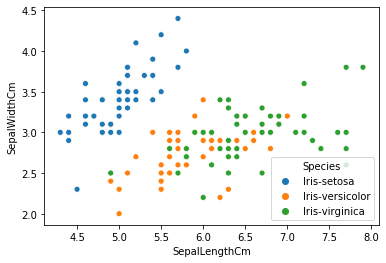

In [226]:
#Exploratory Data Analysis - Sepal Width vs Sepal Length
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = iris, hue = 'Species')

# Setosa Cluster seperated linearly. Virginica and Versicolor clusters intertwined.
# Setosa Sepal Width/Length positively correlated. Lesser relationship between Sepal width/lengths for versicolor & virginica

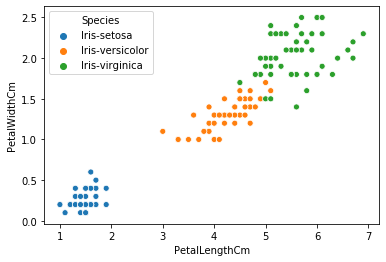

In [227]:
#Petal Width vs Length by species
sns.scatterplot(x='PetalLengthCm', y = 'PetalWidthCm', data = iris, hue = 'Species')

# Notable Clusters between species' Petal size. Linear seperation for Iris-setosa.
#Length and Width notably correlated.

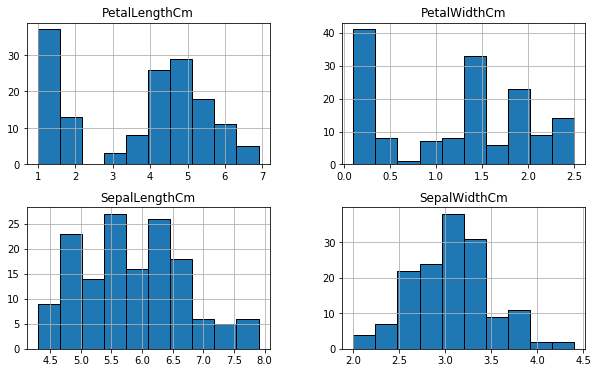

In [228]:
#Distribution of Length and Width
iris.hist(edgecolor = 'black')
fig = plt.gcf()
fig.set_size_inches(10,6)
#High distribution of Petal Length of 1-2 Cm and 4-6 Cm. 
#High distribution of 0 to 0.5 Cm Petal Width
#Sepal length and width relatively normal distribution

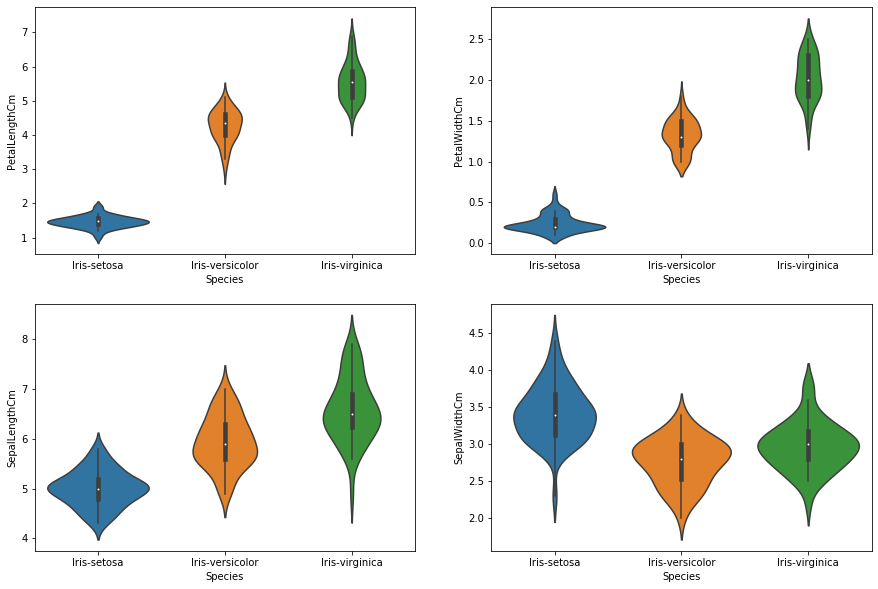

In [229]:
#How do length and width vary? By species.

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

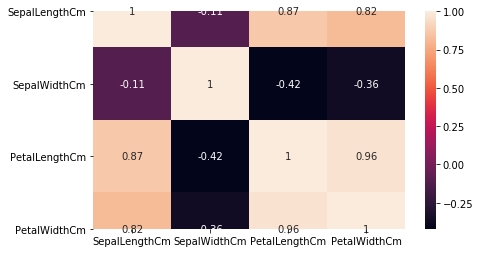

In [231]:
corr = iris.corr()
plt.figure(figsize = (7,4))
sns.heatmap(corr, annot = True)
#Petal length and width highly correlated
#Sepal width and length with low correlation

In [232]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [233]:
train,test = train_test_split(iris, test_size = 0.3) #Splitting data in test and train
print(train.shape, test.shape) #confirm proper size

(105, 5) (45, 5)


In [234]:
X_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] #Training data features
y_train = train[['Species']] #Training value output (training prediction with this output)
X_test = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] #test features
y_test = test[['Species']] #test value output (predicting this output as final result)

In [235]:
X_train.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
4,5.0,3.6,1.4,0.2
42,4.4,3.2,1.3,0.2


In [236]:
X_test.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
115,6.4,3.2,5.3,2.3
52,6.9,3.1,4.9,1.5


In [237]:
y_train.head(2)

,Species
4,Iris-setosa
42,Iris-setosa


In [238]:
y_test.head(2)

,Species
115,Iris-virginica
52,Iris-versicolor


In [292]:
#Support Vector Machine
clf_svm = SVC(gamma = 'auto')
clf_svm.fit(X_train,y_train)
prediction = clf_svm.predict(X_test)
accuracy = accuracy_score(prediction, y_test)
print('The accuracy of SVM is:', accuracy)
#Performing very well

The accuracy of SVM is: 0.9555555555555556


In [276]:
# Logistic Regression
clf_logit = LogisticRegression(solver = 'lbfgs',multi_class = 'auto')
clf_logit.fit(X_train,y_train)
prediction = clf_logit.predict(X_test)
accuracy = accuracy_score(prediction,y_test)
print('The accuracy of Logistic Regression is:', accuracy)

The accuracy of Logistic Regression is: 0.9333333333333333


In [279]:
#KNearest Neighbors, k = 3
clf_knn = KNeighborsClassifier(n_neighbors = 3)
clf_knn.fit(X_train,y_train)
prediction = clf_knn.predict(X_test)
accuracy = accuracy_score(prediction, y_test)
print('The accuracy of KNN is:', accuracy)

The accuracy of KNN is: 0.9555555555555556


([<matplotlib.axis.XTick at 0x1a005daaf08>,
 <a list of 10 Text xticklabel objects>)

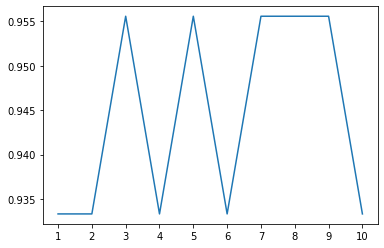

In [275]:
#KNN with k = n
k=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for k in k:
    model=KNeighborsClassifier(n_neighbors=k) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
#K = 3,5,7,8,9 most accurate

In [280]:
#Random Forest Classifier
clf_rf = RandomForestClassifier(random_state = 42)
clf_rf.fit(X_train,y_train)
predictions = clf_rf.predict(X_test)
accuracy = accuracy_score(prediction,y_test)
print('The accuracy of RandomForest is:', accuracy)

The accuracy of RandomForest is: 0.9555555555555556


In [ ]:
# Prediction now strictly with Petal or Sepal data

In [281]:
petal = iris[['PetalLengthCm','PetalWidthCm', 'Species']]
sepal = iris[['SepalLengthCm','SepalWidthCm', 'Species']]

In [288]:
#Splitting and creating Petal train/test/x/y sets
train_p,test_p = train_test_split(petal, test_size = 0.3)
X_train_p = train_p[['PetalLengthCm','PetalWidthCm']]
y_train_p = train_p['Species']
X_test_p = test_p[['PetalLengthCm','PetalWidthCm']]
y_test_p = test_p[['Species']]

In [287]:
## Splitting and creating Sepal Train/test/x/y sets
train_s,test_s = train_test_split(sepal,test_size = 0.3)
X_train_s = train_s[['SepalLengthCm','SepalWidthCm']]
y_train_s = train_s['Species']
X_test_s= test_s[['SepalLengthCm','SepalWidthCm']]
y_test_s = test_s[['Species']]

In [305]:
## SVM (petal)
clf_svm = SVC(gamma = 'auto')
clf_svm.fit(X_train_p,y_train_p)
prediction = clf_svm.predict(X_test_p)
accuracy = accuracy_score(prediction,y_test_p)
print("Petal SVM accuracy is:", accuracy)

Petal SVM accuracy is: 0.9555555555555556


In [311]:
## KNN, k = 3 
clf_knn_p = KNeighborsClassifier(n_neighbors = 3)
clf_knn_p.fit(X_train_p,y_train_p)
prediction_p = clf_knn.predict(X_test_p)
accuracy_p = accuracy_score(prediction_p,y_test_p)

clf_knn_s = KNeighborsClassifier(n_neighbors = 3)
clf_knn_s.fit(X_train_s, y_train_s)
predictions_s = clf_knn_s.predict(X_test_s)
accuracy_s = accuracy_score(predictions_s, y_test_s)

print('KNN accuracy using Petals is:', accuracy_p)
print('KNN accuracy using Sepals is:', accuracy_s)

KNN accuracy using Petals is: 0.9555555555555556
KNN accuracy using Sepals is: 0.8222222222222222


In [312]:
## SVM
clf_svm_p = SVC(gamma = 'auto') 
clf_svm_p.fit(X_train_p,y_train_p)
prediction_p = clf_svm_p.predict(X_test_p)
accuracy_p = accuracy_score(prediction_p,y_test_p)

clf_svm_s = SVC(gamma = 'auto')
clf_svm_s.fit(X_train_s,y_train_s)
prediction_s = clf_svm_s.predict(X_test_s)
accuracy_s = accuracy_score(prediction_s,y_test_s)

print('SVM accuracy using Petals is:', accuracy_p)
print('SVM accuracy using Sepals is:', accuracy_s)

SVM accuracy using Petals is: 0.9555555555555556
SVM accuracy using Sepals is: 0.8222222222222222


In [ ]:
## Accuracy using strictly petals or all data is roughly the same depdnding on the model.